# Regression using Artificial Neural Networks

in this example we will use Keras to predict wages based on various professional and demographic factors.

In [124]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt


pd.set_option('display.float_format', '{:.4f}'.format)

sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


##Load Data

In [125]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [126]:
# Load data file
data = pd.read_csv('/content/gdrive/MyDrive/AIA_DataEncoding/LCA_df.csv')
pd.options.display.max_columns = None

print(data)

                                             Combination                 Code  \
0      Concrete 25/30 | Concrete 20/25 | Concrete 30/...  CON_CON_CON_CON_CON   
1      Concrete 25/30 | Concrete 20/25 | Concrete 30/...  CON_CON_CON_CON_CON   
2      Concrete 25/30 | Concrete 20/25 | Concrete 30/...  CON_CON_CON_CON_CON   
3      Concrete 25/30 | Concrete 20/25 | Concrete 30/...  CON_CON_CON_CON_CON   
4      Concrete 25/30 | Concrete 20/25 | Concrete 30/...  CON_CON_CON_CON_CON   
...                                                  ...                  ...   
12631  Brick | Brick | Concrete 30/37 | Timber frame ...  BRI_BRI_CON_TIF_TIF   
12632  Brick | Brick | Concrete 30/37 | Timber frame ...  BRI_BRI_CON_TIF_TIF   
12633  Brick | Brick | Concrete 30/37 | Timber frame ...  BRI_BRI_CON_TIF_TIF   
12634  Brick | Brick | Concrete 30/37 | Timber frame ...  BRI_BRI_CON_TIF_TIF   
12635  Brick | Brick | Concrete 30/37 | Timber frame ...  BRI_BRI_CON_TIF_TIF   

      EW_Code IW_Code ES_Co

In [127]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12636 entries, 0 to 12635
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Combination                   12636 non-null  object 
 1   Code                          12636 non-null  object 
 2   EW_Code                       12636 non-null  object 
 3   IW_Code                       12636 non-null  object 
 4   ES_Code                       12636 non-null  object 
 5   IS_Code                       12636 non-null  object 
 6   RO_Code                       12636 non-null  object 
 7   EW_A-D/m²                     12636 non-null  float64
 8   IW_A-D/m²                     12636 non-null  float64
 9   ES_A-D/m²                     12636 non-null  float64
 10  IS_A-D/m²                     12636 non-null  float64
 11  RO_A-D/m²                     12636 non-null  float64
 12  ITERATION                     12636 non-null  object 
 13  I

In [128]:
for colname, col in data.items():
  print(colname, "min_val", col.min(), "max_val", col.max())

Combination min_val Brick | Brick | Concrete 30/37 | Concrete 25/30 | Concrete 30/37 max_val Timber frame | Timber frame | Concrete 30/37 | Timber frame | Timber frame
Code min_val BRI_BRI_CON_CON_CON max_val TIM_TIM_CON_TIM_TIM
EW_Code min_val BRI max_val TIM
IW_Code min_val BRI max_val TIM
ES_Code min_val CON max_val CON
IS_Code min_val CON max_val TIM
RO_Code min_val CON max_val TIM
EW_A-D/m² min_val -2.55 max_val 32.11
IW_A-D/m² min_val -1.62 max_val 24.67
ES_A-D/m² min_val 34.88 max_val 34.88
IS_A-D/m² min_val -2.78 max_val 28.54
RO_A-D/m² min_val -2.78 max_val 34.88
ITERATION min_val SUM max_val SUM
ID min_val 50_70_0_12_1500_3000_True_0.3_36_0_40_20 max_val 50_70_0_12_3300_3000_True_0.3_36_75_40_20
LEVEL min_val 10 max_val 15
USABLE_AREA min_val 177 max_val 663
TOTAL_AREA min_val 747 max_val 888
1BD min_val 5 max_val 92
2BD min_val 0 max_val 44
3BD min_val 0 max_val 5
N_WALLS min_val 276.0 max_val 729.0
WALLS_M2 min_val 1200.0 max_val 4573.0
N_EXT_WALLS min_val 60.0 max_val 221.

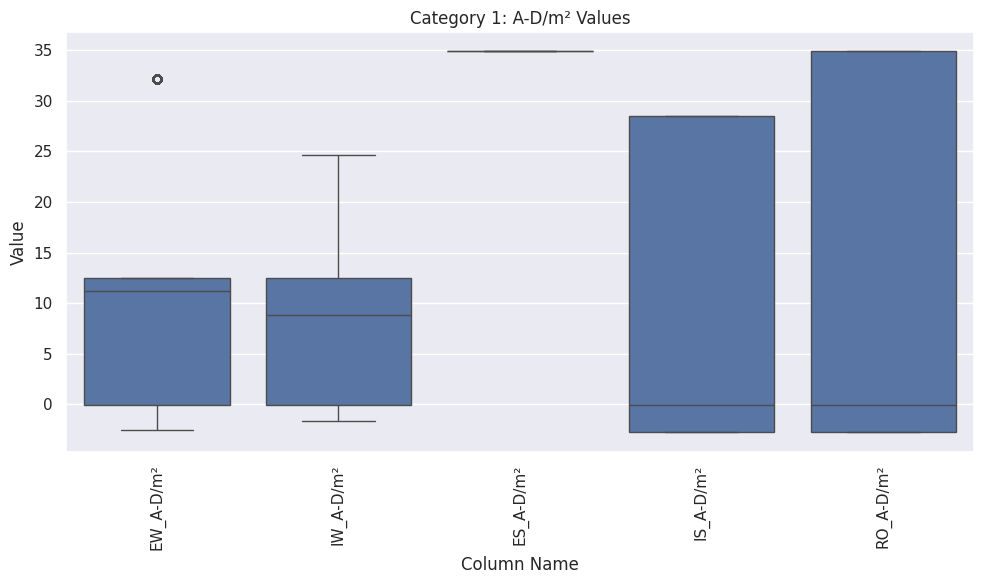

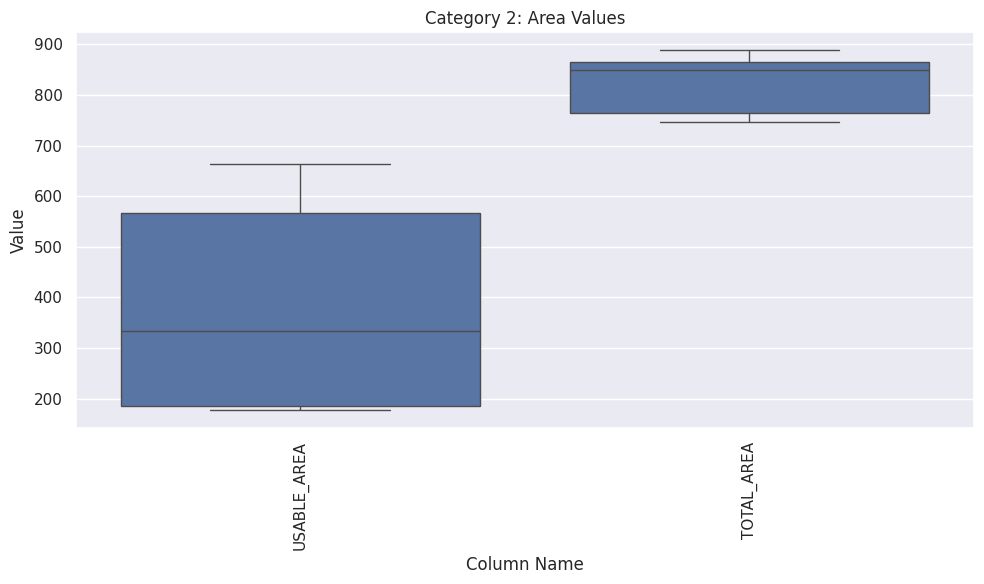

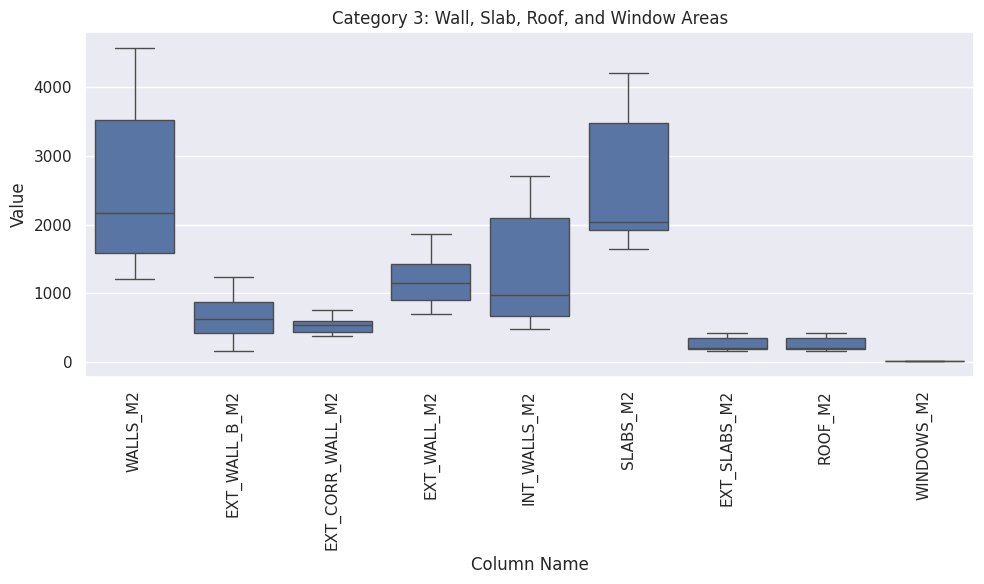

In [129]:
# Define the categories
cat1 = [
    'EW_A-D/m²', 'IW_A-D/m²', 'ES_A-D/m²', 'IS_A-D/m²', 'RO_A-D/m²'
]

cat2 = [
    'USABLE_AREA', 'TOTAL_AREA'
]

cat3 = [
    'WALLS_M2', 'EXT_WALL_B_M2', 'EXT_CORR_WALL_M2',
    'EXT_WALL_M2', 'INT_WALLS_M2', 'SLABS_M2',
    'EXT_SLABS_M2', 'ROOF_M2', 'WINDOWS_M2'
]

# Function to plot a category
def plot_category(df, columns, title):
    data_melted = data[columns].melt(var_name='Column Name', value_name='Value')
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Column Name', y='Value', data=data_melted)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot each category
plot_category(data, cat1, 'Category 1: A-D/m² Values')
plot_category(data, cat2, 'Category 2: Area Values')
plot_category(data, cat3, 'Category 3: Wall, Slab, Roof, and Window Areas')



In [130]:
data.describe()

,EW_A-D/m²,IW_A-D/m²,ES_A-D/m²,IS_A-D/m²,RO_A-D/m²,LEVEL,USABLE_AREA,TOTAL_AREA,1BD,2BD,3BD,N_WALLS,WALLS_M2,N_EXT_WALLS,EXT_WALL_B_M2,N_EXT_CORR_WALL,EXT_CORR_WALL_M2,EXT_WALL_M2,N_INT_WALLS,INT_WALLS_M2,N_SLABS,SLABS_M2,N_EXT_SLABS,EXT_SLABS_M2,ROOF_M2,N_INT_SLABS,INT_SLABS_M2,N_WINDOWS,WINDOWS_M2,N_CORR_WINDOWS,CORR_WINDOWS_M2,N_DOORS,N_COLUMNS,VOLUME_M3,COMPACTNESS,Corrected Total Weighted A-D,GWP_A-D
count,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,12636.0000,0.0000,12636.0000,12636.0000,12636.0000,12636.0000
mean,10.7083,8.8400,34.8800,8.5500,10.6633,11.4103,372.3077,822.0769,36.5641,16.1026,0.6667,453.7179,2499.7179,135.9744,642.2308,162.2308,530.7436,1172.9744,155.5128,1326.8718,344.7692,2568.0000,34.5641,256.8974,256.8974,275.8205,2054.4359,99.3333,14.5385,162.2308,929.3333,53.3333,NaN,7708.1538,0.1918,53553.1946,53555.5396
std,11.2121,8.7364,0.0000,14.1776,17.1591,2.2501,178.9460,48.4207,23.0491,13.1091,1.0702,160.6893,1026.4522,56.5234,272.4497,32.6254,106.6257,330.0564,83.0899,712.7979,103.9460,862.9742,10.3303,86.2127,86.2127,83.1568,690.4161,42.9360,4.3787,32.6254,187.0045,25.8817,NaN,2587.8798,0.0267,41188.1006,41182.1401
min,-2.5500,-1.6200,34.8800,-2.7800,-2.7800,10.0000,177.0000,747.0000,5.0000,0.0000,0.0000,276.0000,1200.0000,60.0000,162.0000,116.0000,380.0000,702.0000,57.0000,483.0000,238.0000,1638.0000,24.0000,164.0000,164.0000,190.0000,1310.0000,41.0000,9.0000,116.0000,664.0000,22.0000,NaN,4920.0000,0.1600,-5030.5700,-4996.9700
25%,-0.0700,-0.0500,34.8800,-2.7800,-2.7800,10.0000,186.0000,765.0000,17.0000,5.0000,0.0000,310.0000,1588.0000,75.0000,423.0000,132.0000,432.0000,894.0000,79.0000,670.0000,261.0000,1917.0000,26.0000,192.0000,192.0000,209.0000,1534.0000,54.0000,9.0000,132.0000,756.0000,29.0000,NaN,5757.0000,0.1700,21586.3475,21595.8300
50%,11.1600,8.8000,34.8800,-0.1100,-0.1100,10.0000,333.0000,849.0000,31.0000,14.0000,0.0000,391.0000,2171.0000,132.0000,630.0000,166.0000,543.0000,1144.0000,116.0000,980.0000,287.0000,2043.0000,29.0000,204.0000,204.0000,230.0000,1634.0000,95.0000,18.0000,166.0000,951.0000,47.0000,NaN,6132.0000,0.1800,44084.6150,44084.5650
75%,12.4400,12.4400,34.8800,28.5400,34.8800,15.0000,567.0000,864.0000,55.0000,26.0000,1.0000,629.0000,3522.0000,187.0000,873.0000,183.0000,599.0000,1427.0000,245.0000,2095.0000,444.0000,3474.0000,44.0000,347.0000,347.0000,355.0000,2779.0000,141.0000,18.0000,183.0000,1048.0000,81.0000,NaN,10425.0000,0.2100,72955.8025,72950.9250
max,32.1100,24.6700,34.8800,28.5400,34.8800,15.0000,663.0000,888.0000,92.0000,44.0000,5.0000,729.0000,4573.0000,221.0000,1242.0000,233.0000,762.0000,1863.0000,317.0000,2711.0000,557.0000,4212.0000,56.0000,421.0000,421.0000,446.0000,3370.0000,169.0000,18.0000,233.0000,1335.0000,104.0000,NaN,12639.0000,0.2600,252267.3000,252250.0600


we can see that some predictors are binary, while others are not

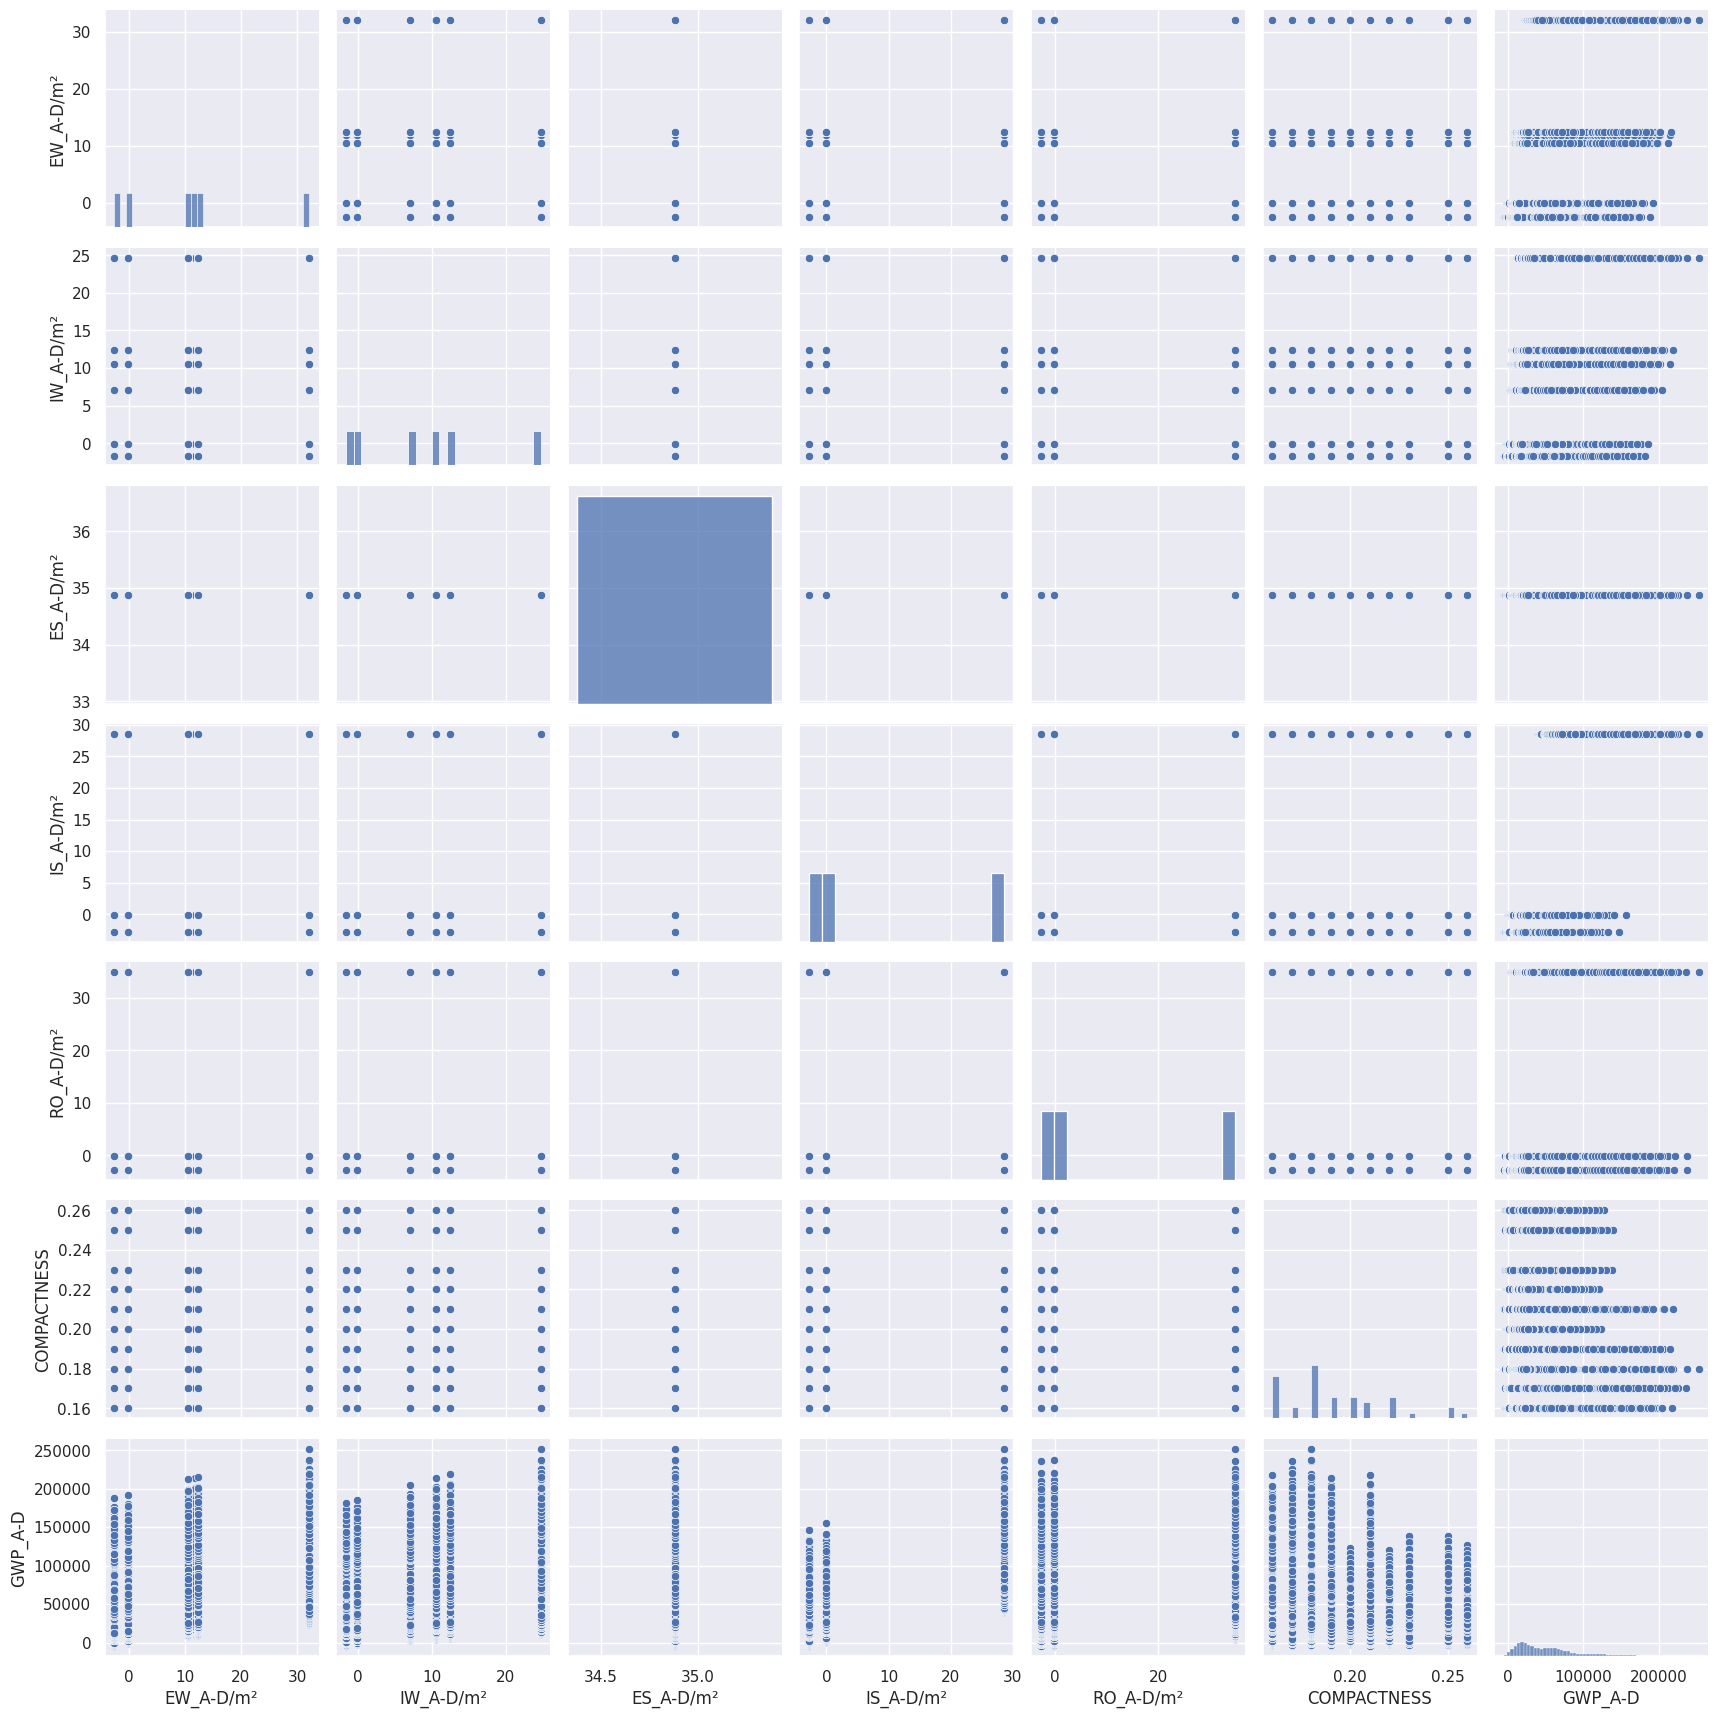

In [131]:
# Select only numerical columns
data_numerical = data[['EW_A-D/m²', 'IW_A-D/m²', 'ES_A-D/m²', 'IS_A-D/m²', 'RO_A-D/m²', 'COMPACTNESS', 'GWP_A-D']]

# Now make the pairplot
sns.pairplot(data_numerical)
plt.show()

We can see there is a direct relationship between age and experience, but not so much between wage and education, there is a non-linearity

##Prepare Data

**NORMALIZE INPUTS**

In [132]:
#declare features
X = data.loc[:,['EW_Code','IW_Code','ES_Code', 'IS_Code', 'RO_Code', 'COMPACTNESS']]
X

,EW_Code,IW_Code,ES_Code,IS_Code,RO_Code,COMPACTNESS
0,CON,CON,CON,CON,CON,0.1900
1,CON,CON,CON,CON,CON,0.2200
2,CON,CON,CON,CON,CON,0.2500
3,CON,CON,CON,CON,CON,0.2600
4,CON,CON,CON,CON,CON,0.1800
...,...,...,...,...,...,...
12631,BRI,BRI,CON,TIF,TIF,0.2000
12632,BRI,BRI,CON,TIF,TIF,0.2100
12633,BRI,BRI,CON,TIF,TIF,0.1600
12634,BRI,BRI,CON,TIF,TIF,0.1800


In [133]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

X['EW_Code'] = encoder.fit_transform(X['EW_Code'])
X['IW_Code'] = encoder.fit_transform(X['IW_Code'])
X['ES_Code'] = encoder.fit_transform(X['ES_Code'])
X['IS_Code'] = encoder.fit_transform(X['IS_Code'])
X['RO_Code'] = encoder.fit_transform(X['RO_Code'])

X

,EW_Code,IW_Code,ES_Code,IS_Code,RO_Code,COMPACTNESS
0,1,1,0,0,0,0.1900
1,1,1,0,0,0,0.2200
2,1,1,0,0,0,0.2500
3,1,1,0,0,0,0.2600
4,1,1,0,0,0,0.1800
...,...,...,...,...,...,...
12631,0,0,0,1,1,0.2000
12632,0,0,0,1,1,0.2100
12633,0,0,0,1,1,0.1600
12634,0,0,0,1,1,0.1800


In [134]:
#same code as last time


# Load and instantiate a StandardSclaer
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(X)

print(X_scaled.shape)

(12636, 6)


In [135]:
#declare regression target
y = data.loc[:,"GWP_A-D"].to_numpy()

y = y.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()

#In this case it makes sense to use MinMax scaling because the wage seems like a relative range
# Apply the scaler to our Y-features
y_scaled = scalerY.fit_transform(y)

print(y_scaled.shape)


(12636, 1)


**SPLIT INTO TRAIN AND TEST**

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 21)

In [137]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)


TRAIN input (10108, 6) output (10108, 1)
TEST input (2528, 6) output (2528, 1)


#Build model

From the cheatSheet
Regression between 0 and 1>>
      activation = relu for hidden layers / sigmoid for final layer
      loss = mean squared error
      optimizer = adam
      input from data, is 8 columns
      output is 1 value prediction

In [138]:
# Instantiate a sequential model
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]

model.add(tf.keras.layers.Dense(4, input_shape=(n_cols,), activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
#model.add(tf.keras.layers.Dense(8, activation='relu'))

# Compile your model
model.compile(optimizer = "adam", loss = "mean_squared_error")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [139]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │            40 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68 (272.00 B)

 Trainable params: 68 (272.00 B)

 Non-trainable params: 0 (0.00 B)

#Train model

In [140]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=500, validation_split=0.2)

Epoch 1/500
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0978 - val_loss: 0.0535
Epoch 2/500
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0459 - val_loss: 0.0322
Epoch 3/500
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0258 - val_loss: 0.0196
Epoch 4/500
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0168 - val_loss: 0.0132
Epoch 5/500
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 6/500
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0109 - val_loss: 0.0110
Epoch 7/500
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 8/500
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0092 - val_loss: 0.0096
Epoch 9/500
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0085 - val_loss: 0.0093
Epoch 10/500
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0086 - val_loss: 0.0090
Epoch 11/500
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0081 - val_loss: 0.0089
Epoch 12/500
253/253 ━━━━━━━━━━━━━━━━━━━━

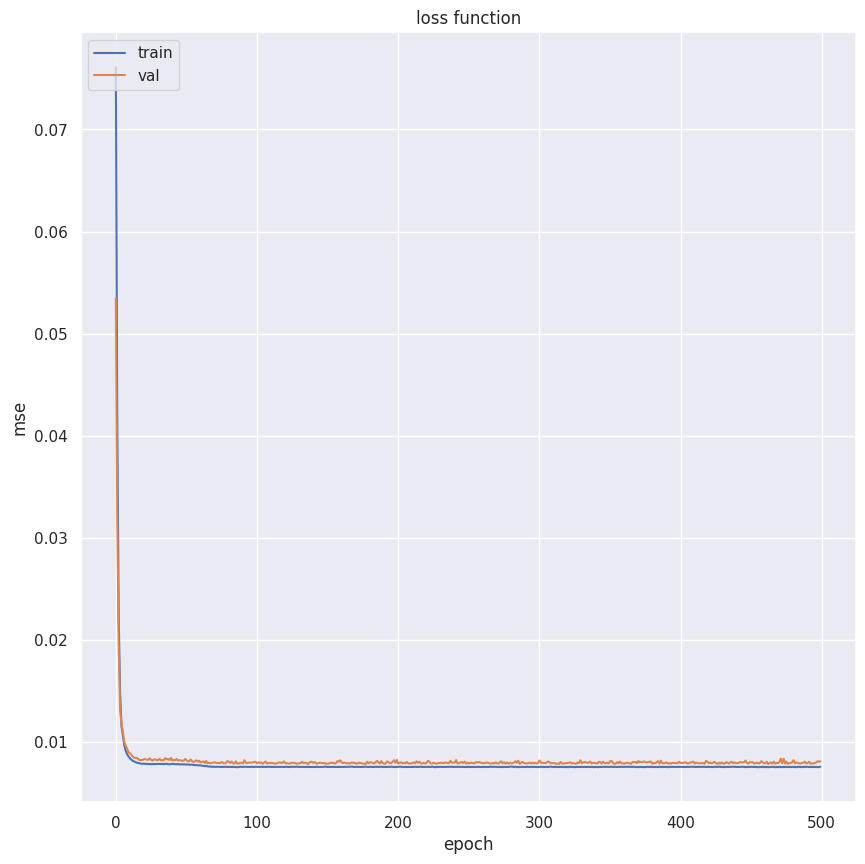

In [147]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Evaluate model on test data



In [148]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080
mse_test: 0.00789977889508009


we can see the model is again slightly overfitting, but what does this translate in terms of USD accuracy of our prediction?

#Plot error


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(0, 0.5, 'y_pred')

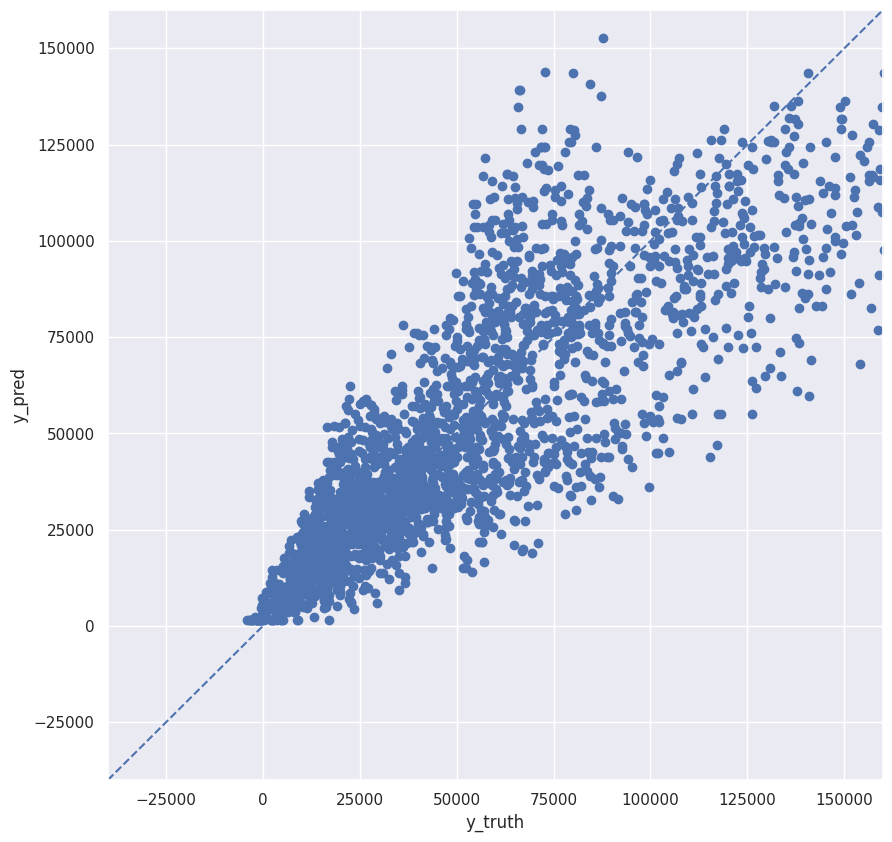

In [149]:
y_pred = scalerY.inverse_transform(model.predict(X_test))[:, 0] # Select the first (and only) column
y_truth = scalerY.inverse_transform(y_test)[:, 0]  # Select the first (and only) column


plt.scatter(y_truth,y_pred)
plt.ylim((-40000,160000))
plt.xlim((-40000,160000))
plt.axline((0,0), slope = 1, ls="--")


plt.xlabel("y_truth")
plt.ylabel("y_pred")


In [150]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots(figsize = (10,10))
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  plt.title('Prediction Comparison')
  plt.show()

[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.11022302e-16
 1.11022302e-16 2.00000000e+00]


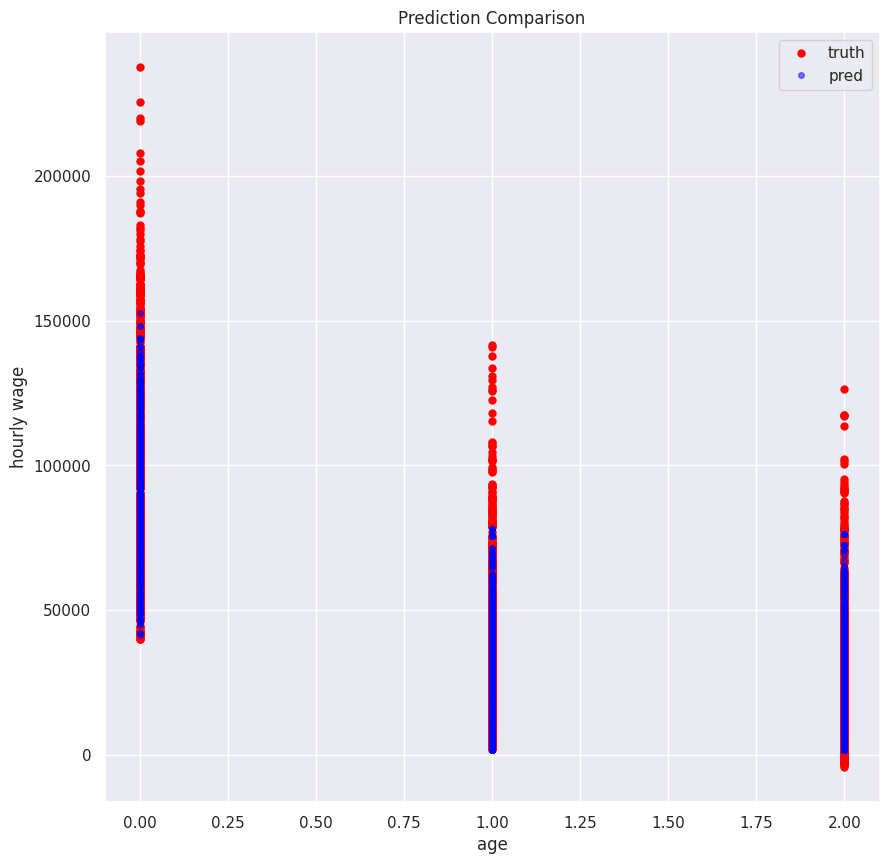

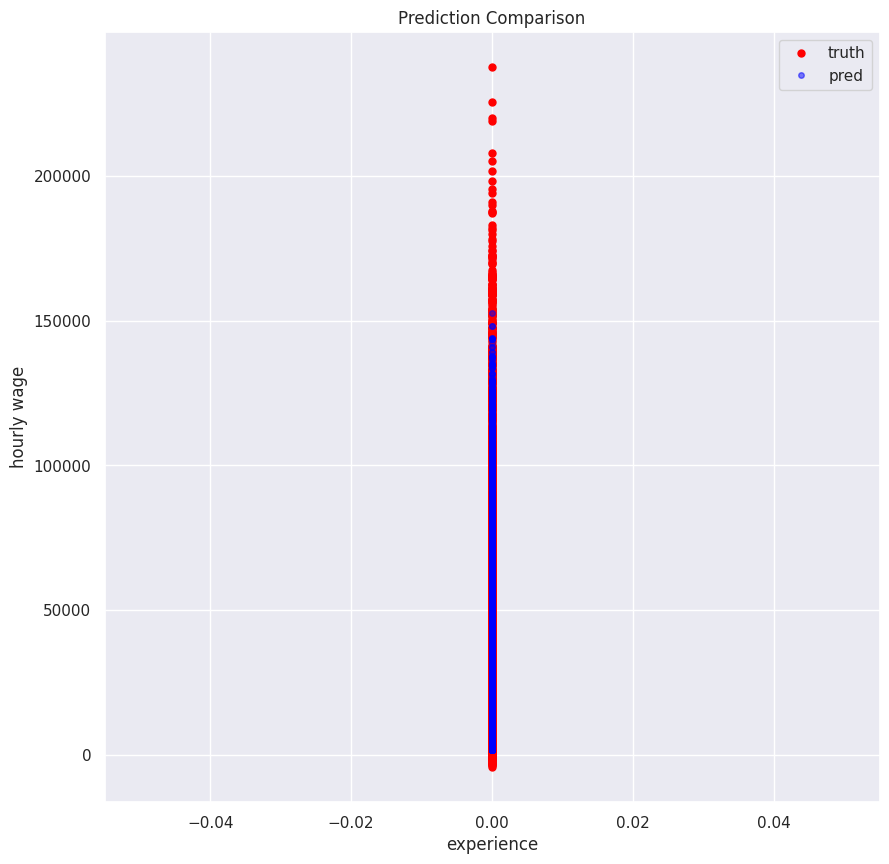

In [151]:
age_test = (scalerX.inverse_transform(X_test)[:,3])
print(age_test)

exp_test = (scalerX.inverse_transform(X_test)[:,2])

plot_comparison(age_test, y_pred, y_truth, "age", "hourly wage")
plot_comparison(exp_test, y_pred, y_truth,  "experience", "hourly wage")

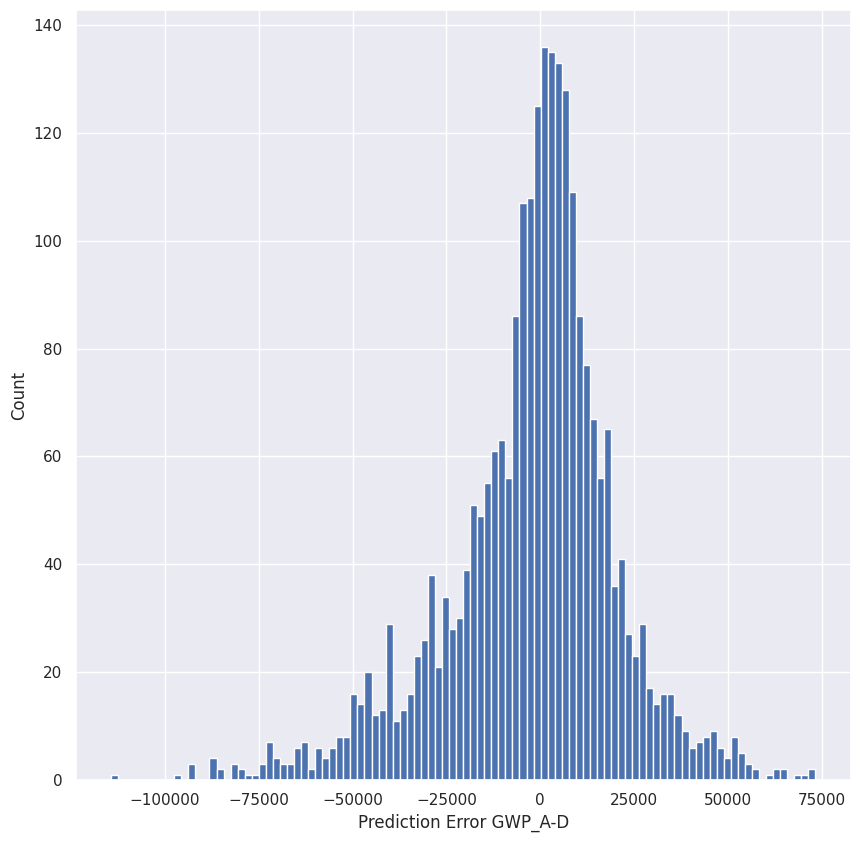

In [152]:
error = y_pred - y_truth
plt.hist(error, bins=100)
plt.xlabel('Prediction Error GWP_A-D')
_ = plt.ylabel('Count')